Data Science Revealed by Tshepo Chris Nokeri, Apress. 2021

# Chapter 5: Stock Clustering

The K-Means model partitions the data into k (clusters) with the nearest mean (centroids), it then finds the distance between subgroups to produce a cluster. It simultaneously shrinks the intra-cluster distances and improves the inter-cluster

# Import Dependencies

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set("talk","ticks",font_scale=1,font="Calibri")
from pylab import rcParams
plt.rcParams["figure.dpi"] = 300
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import datetime as dt
import scipy
from pandas_datareader import data
from sklearn.cluster import KMeans

In [12]:
tickers = ['AMZN','AAPL','WBA',
           'NOC','BA','LMT',
           'MCD','INTC','NAV',
           'IBM','TXN','MA',
           'MSFT','GE','AXP',
           'PEP','KO','JNJ',
           'TM','HMC','MSBHY',
           'SNE','XOM','CVX',
           'VLO','F','BAC']
start_date = '2010-01-01'
end_date = '2020-11-01'
df = data.get_data_yahoo(tickers, start_date, end_date)[['Adj Close']]
df.head()

Attributes   Adj Close                                                        \
Symbols           AMZN      AAPL        WBA        NOC         BA        LMT   
Date                                                                           
2010-01-04  133.899994  6.583586  28.326071  39.991074  43.777542  53.263012   
2010-01-05  134.690002  6.594968  28.098249  40.061401  45.211330  53.817471   
2010-01-06  132.250000  6.490066  27.885616  40.216160  46.582798  53.027367   
2010-01-07  130.000000  6.478067  28.052691  40.631191  48.468555  51.571884   
2010-01-08  133.520004  6.521136  28.090660  40.406101  48.001007  52.403591   

Attributes                                              ...             \
Symbols           MCD       INTC        NAV        IBM  ...        JNJ   
Date                                                    ...              
2010-01-04  45.185108  14.864470  40.150002  92.528694  ...  46.298389   
2010-01-05  44.839626  14.857353  39.720001  91.410950  ...  45.761547   
2010-01-06  44.227863  14.807525  40.950001  90.817116  ...  46.133747   
2010-01-07  44.551743  14.665145  41.000000  90.502762  ...  45.804497   
2010-01-08  44.508553  14.828878  40.549999  91.410950  ...  45.961971   

Attributes                                                                    \
Symbols            TM        HMC        SNE        XOM        CVX        VLO   
Date                                                                           
2010-01-04  72.314583  34.525009  30.020000  45.575386  50.816982  11.529408   
2010-01-05  71.201118  34.286152  29.879999  45.753330  51.176937  11.825860   
2010-01-06  72.110588  33.987579  29.850000  46.148773  51.183357  12.122313   
2010-01-07  71.218140  33.410339  29.799999  46.003792  50.990532  12.212536   
2010-01-08  72.892555  34.176678  30.410000  45.819229  51.080528  12.044977   

Attributes                             
Symbols            F        BAC MSBHY  
Date                                   
2010-01-04  6.968545  13.663458   NaN  
2010-01-05  7.429503  14.107587   NaN  
2010-01-06  7.707428  14.273045   NaN  
2010-01-07  7.904015  14.743298   NaN  
2010-01-08  7.924348  14.612673   NaN  

[5 rows x 27 columns]

# Data Preprocessing

In [15]:
returns = df.pct_change().mean() * (10*12)
std = df.pct_change().std() * np.sqrt((10*12))

In [16]:
ret_var = pd.concat([returns, std], axis = 1).dropna()
ret_var.columns = ["Returns","Standard Deviation"]
ret_var = ret_var.dropna()

In [17]:
ret_var

Returns  Standard Deviation
Attributes Symbols                              
Adj Close  AMZN     0.161408            0.219298
           AAPL     0.142520            0.195328
           WBA      0.025443            0.190796
           NOC      0.099019            0.156366
           BA       0.081806            0.241513
           LMT      0.092771            0.144668
           MCD      0.076515            0.132609
           INTC     0.066716            0.195823
           NAV      0.076994            0.390811
           IBM      0.019014            0.154290
           TXN      0.104789            0.185254
           MA       0.127789            0.194159
           MSFT     0.108985            0.175395
           GE       0.006226            0.217377
           AXP      0.061691            0.195526
           PEP      0.055518            0.120928
           KO       0.044974            0.120511
           JNJ      0.054099            0.117171
           TM       0.037129            0.147504
           HMC     -0.002639            0.167707
           SNE      0.070541            0.225907
           XOM     -0.003797            0.159237
           CVX      0.029708            0.184557
           VLO      0.086470            0.263032
           F        0.027856            0.216174
           BAC      0.053830            0.244936

# Elbow Curve

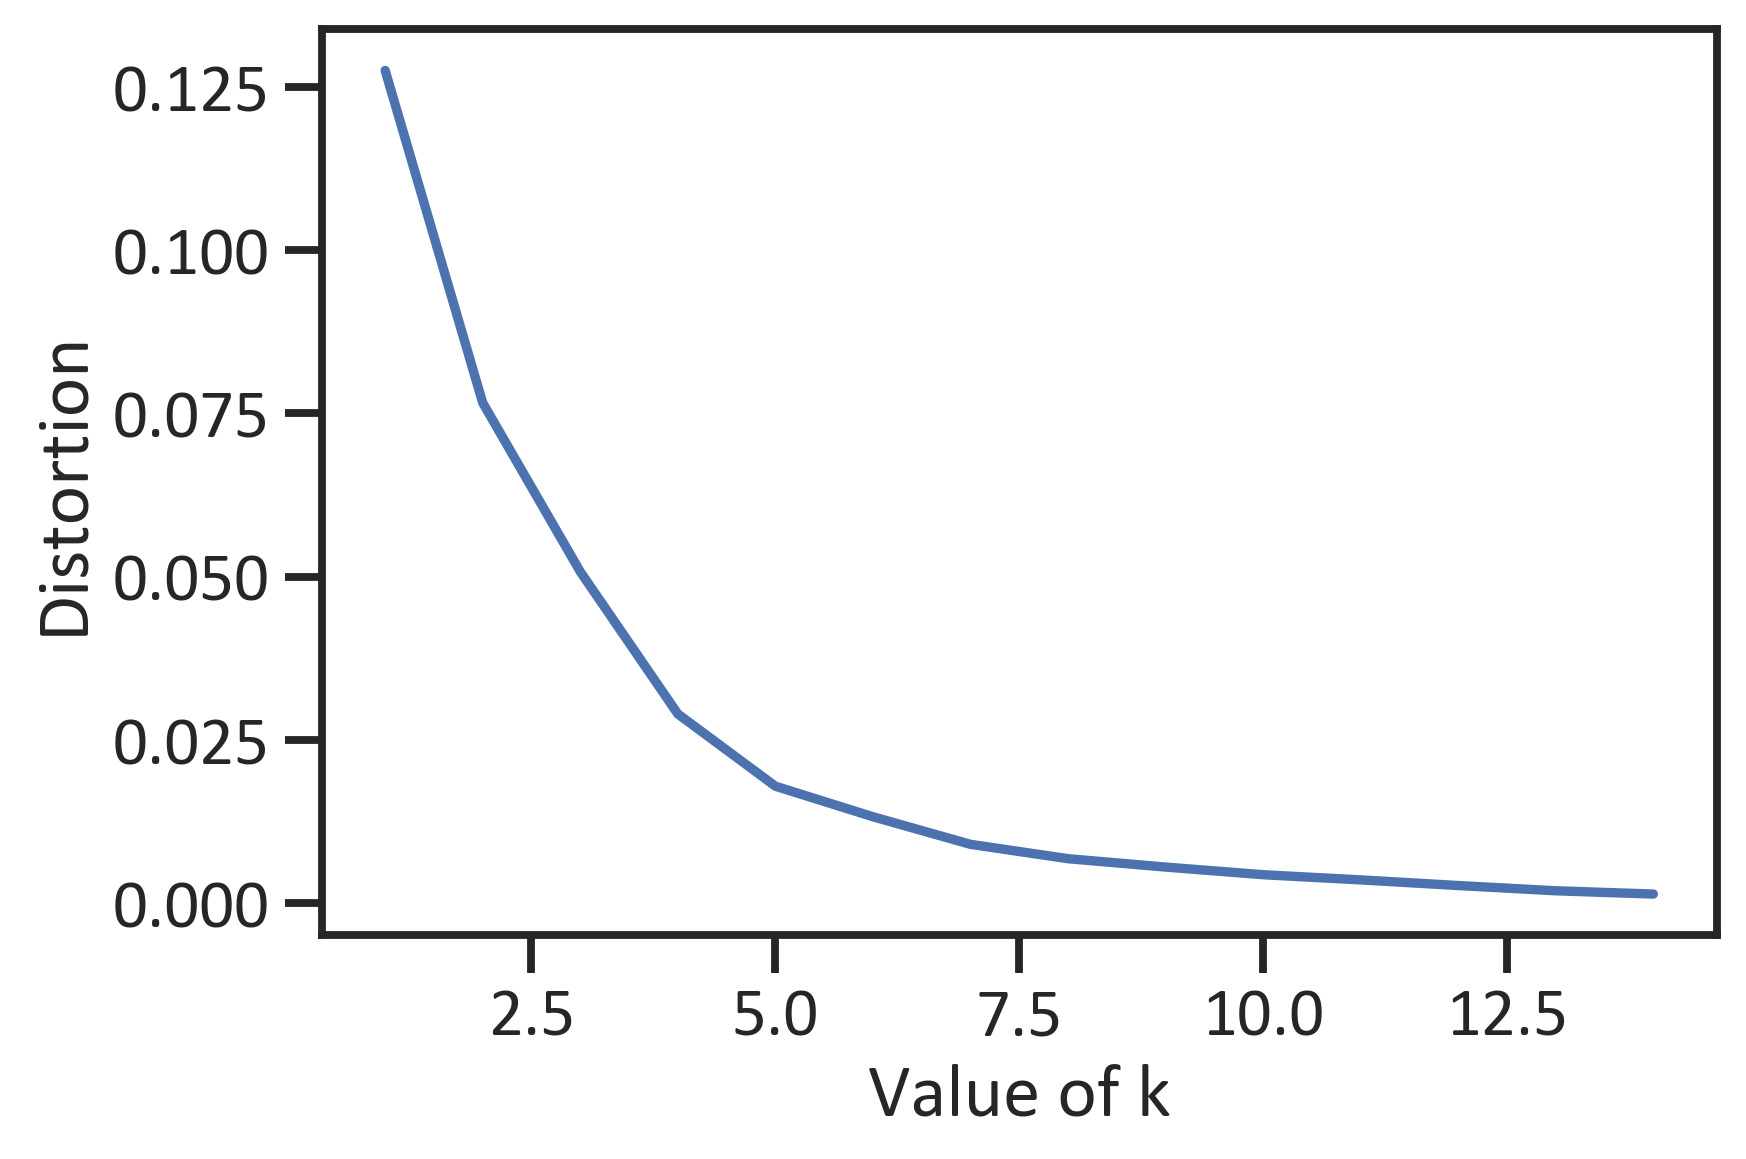

In [19]:
X =  ret_var.values
sse = []
for k in range(1,15):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_) 
plt.plot(range(1,15), sse)
plt.xlabel("Value of k")
plt.ylabel("Distortion")
plt.show()

## Develop the K-Means Model

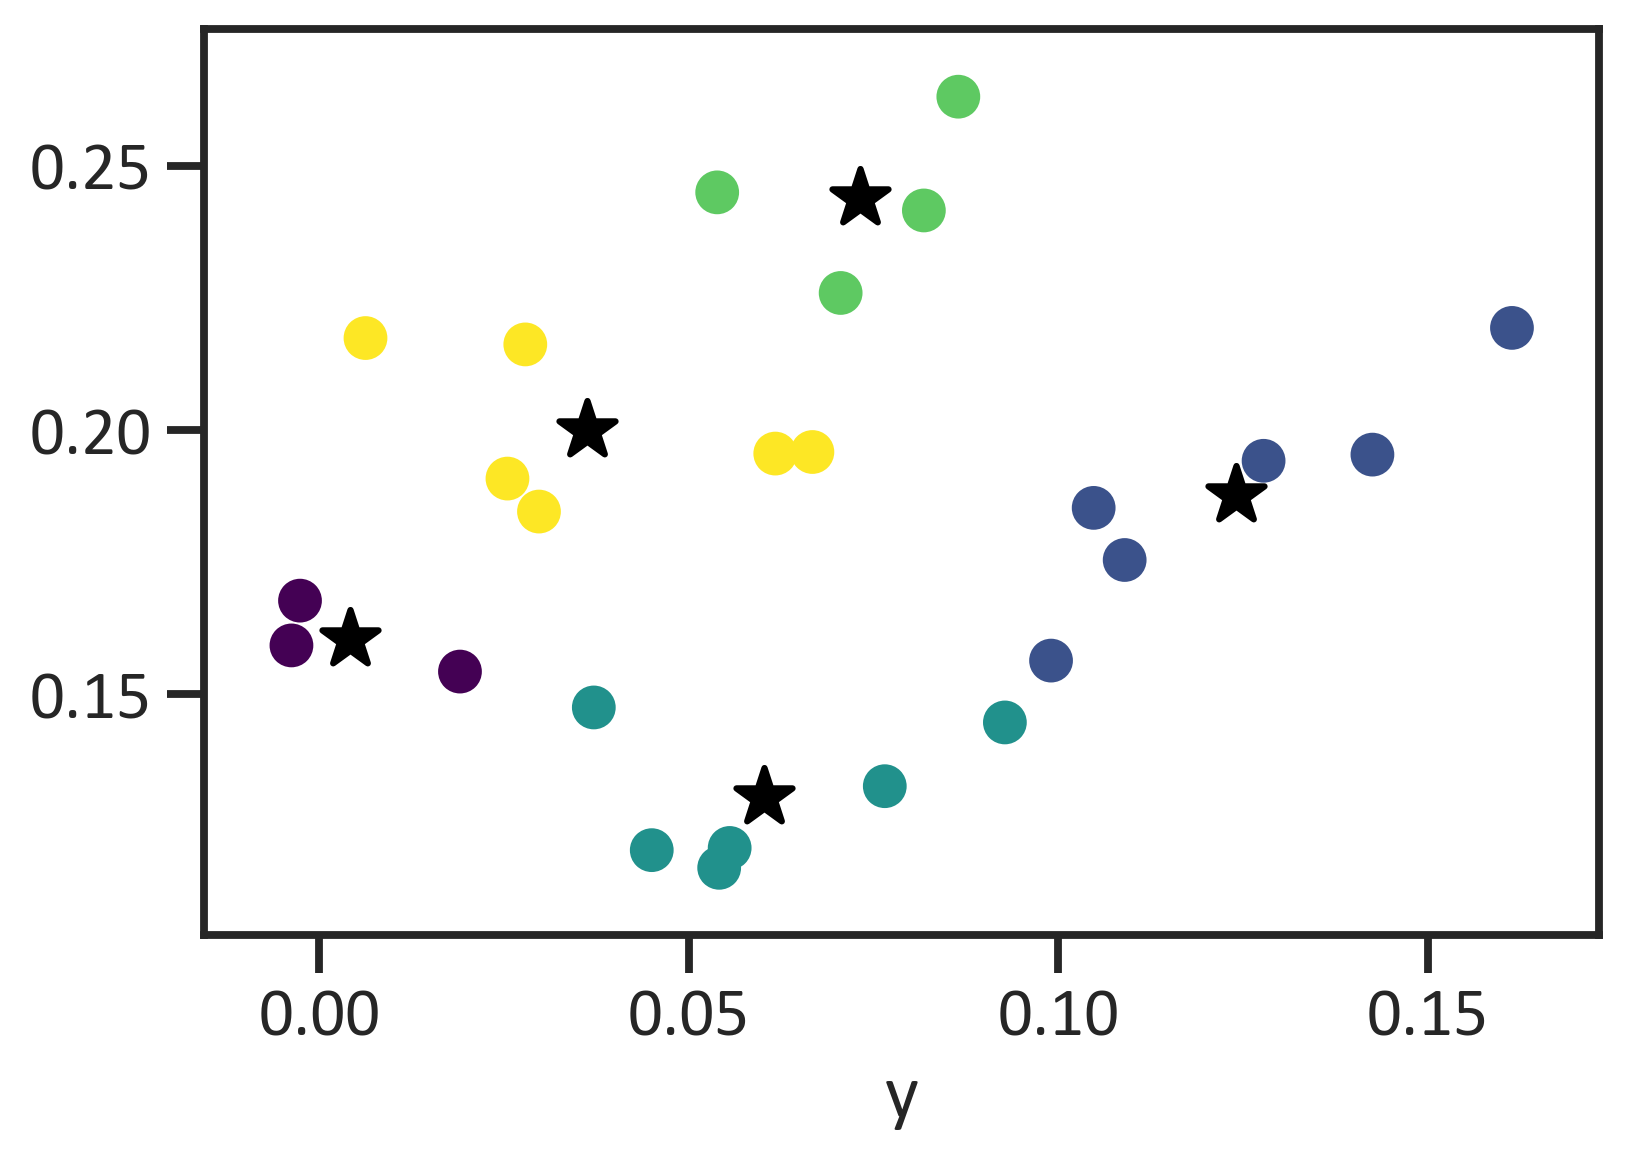

In [20]:
stdOrder = ret_var.sort_values('Standard Deviation',ascending=False)
first_symbol = stdOrder.index[0]
ret_var.drop(first_symbol,inplace=True)
X = ret_var.values
kmeans =KMeans(n_clusters = 5).fit(X)
centroids = kmeans.cluster_centers_
plt.scatter(X[:,0],X[:,1], c = kmeans.labels_, cmap ="viridis")
plt.scatter(centroids[:,0], centroids[:,1],color="black",marker="*",s=200)
plt.xlabel("y")
plt.show()

## Show Cluster, Returns and Volatility

In [21]:
stocks = pd.DataFrame(ret_var.index)
cluster_labels = pd.DataFrame(kmeans.labels_)
stockClusters = pd.concat([stocks, cluster_labels],axis = 1)
stockClusters.columns = ['Symbol','Cluster']
x_df = pd.DataFrame(X, columns = ["Returns", "Volatility"])
closerv = pd.concat([stockClusters,x_df],axis=1)
closerv = closerv.set_index("Symbol")
closerv

,Cluster,Returns,Volatility
Symbol,,,
"(Adj Close, AMZN)",1,0.161408,0.219298
"(Adj Close, AAPL)",1,0.142520,0.195328
"(Adj Close, WBA)",4,0.025443,0.190796
"(Adj Close, NOC)",1,0.099019,0.156366
"(Adj Close, BA)",3,0.081806,0.241513
"(Adj Close, LMT)",2,0.092771,0.144668
"(Adj Close, MCD)",2,0.076515,0.132609
"(Adj Close, INTC)",4,0.066716,0.195823
"(Adj Close, IBM)",0,0.019014,0.154290


In [26]:
from sklearn import metrics
y_predkmeans = pd.DataFrame(kmeans.predict(X))
y_predkmeans = y_predkmeans.dropna()
metrics.silhouette_score(X,y_predkmeans)

0.4260002825147118